# 1. Data Gathering / Data Acquisition

In [1]:
#Import Data Libraries
import pandas as pd
import numpy as np

#Import Vis Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#loading of data
df1=pd.read_csv("train.csv")
df1.head() # to check the first 5 of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Preparation of Data

### Cleaning of the Data

In [2]:
#Removing Unnecessary Data 
df2 = df1.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1) #dropping of the columns I think is not important
print (df2)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [3]:
#checking for null data
df2.isnull().sum().sort_values(ascending=False)  #used to check if there are empty or null in the data

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [4]:
#filling up the null data with the median value of the age column
col=["Age"]

for cell in col:
    df2[cell].fillna(df2[cell].median(),inplace=True)

In [5]:
df2.isnull().sum().sort_values(ascending=False) #checking again if there is no empty or null in the age feature

Embarked    2
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [6]:
#replacing null value to Unknown location "U"
df2.Embarked.fillna("U", inplace=True) #substitung the empty or null value in the embarked feature with U

In [7]:
df2.isnull().sum().sort_values(ascending=False)  #used to check if there are empty or null in the data

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
df2 # checking the new data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Visualization of Data

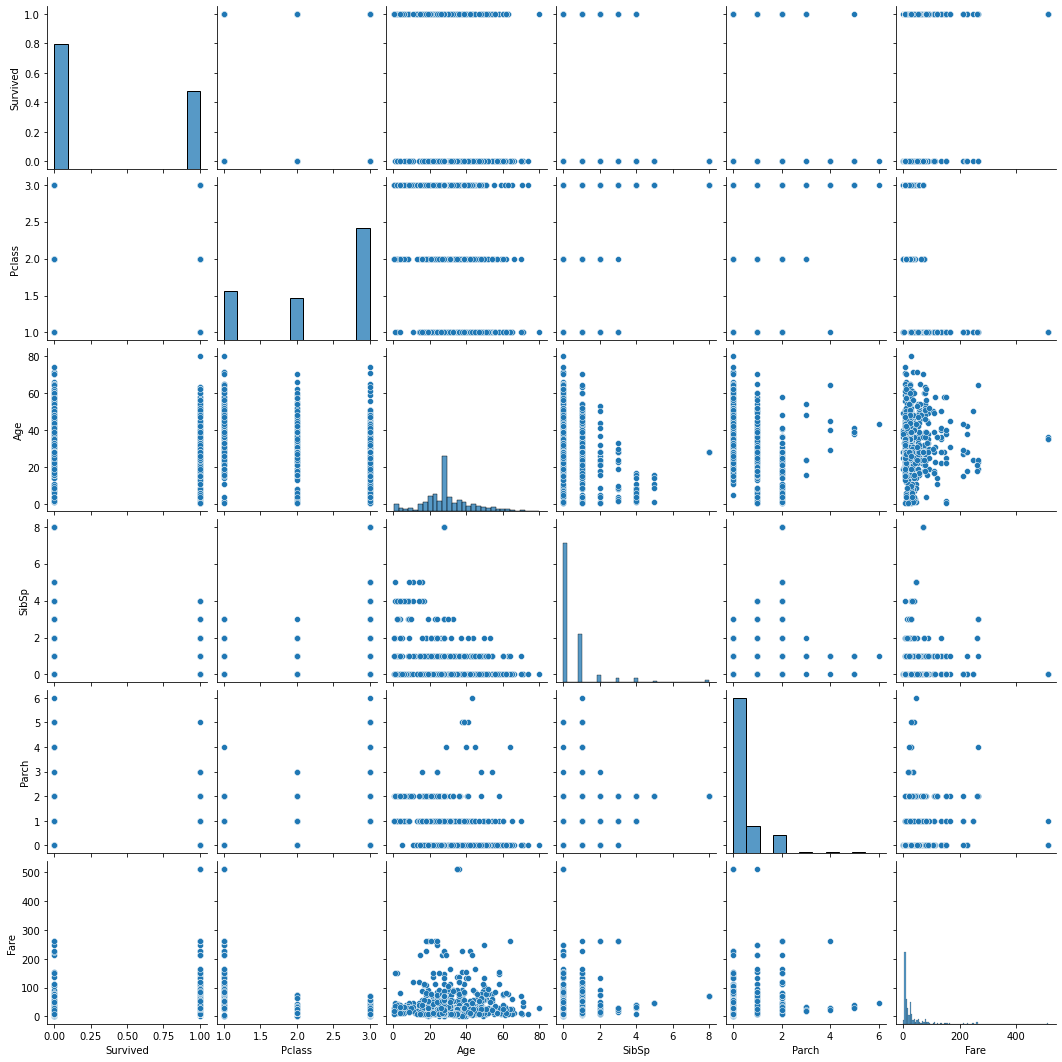

In [9]:
sns.pairplot(df2) # generating pair plot to all of the numerical feature

<AxesSubplot:xlabel='Survived', ylabel='count'>

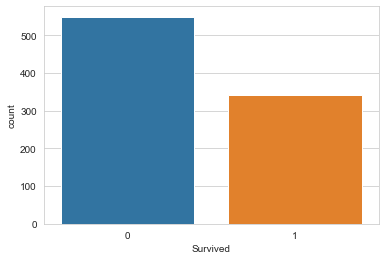

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df2) # count plot on one variable which is the survival of a person

<AxesSubplot:xlabel='Sex', ylabel='count'>

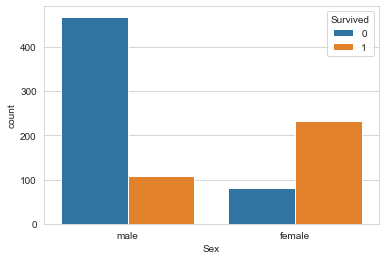

In [11]:
sns.countplot(x='Sex',hue='Survived', data=df2) # count plot on sex and their survival

<AxesSubplot:xlabel='SibSp', ylabel='count'>

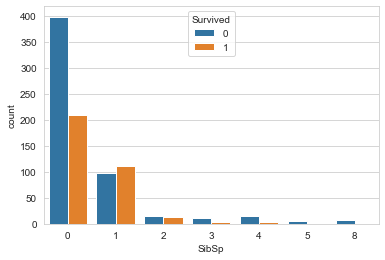

In [12]:
sns.countplot(x='SibSp',hue='Survived', data=df2) # count plot on the number of sibling and/or spouse of a person and their survival

<AxesSubplot:xlabel='Parch', ylabel='count'>

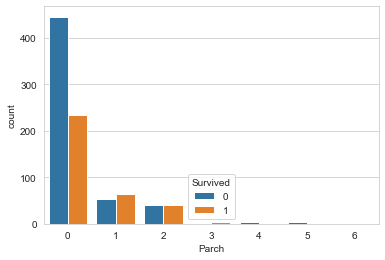

In [13]:
sns.countplot(x='Parch',hue='Survived', data=df2) # count plot on the number of parent and/or children of a person and their survival

## Data Preprocessing

In [14]:
# converting male = 1, female = 0 , C=0 , Q= 1 , S= 2, U=3 
from sklearn import preprocessing
le= preprocessing.LabelEncoder()

cols=["Sex","Embarked"]

for col in cols:
    df2[col]=le.fit_transform(df2[col])
    print(le.classes_)
    
df2

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<AxesSubplot:xlabel='Embarked', ylabel='count'>

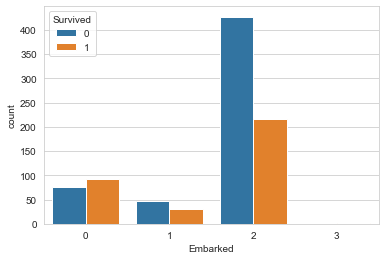

In [15]:
sns.countplot(x='Embarked',hue='Survived', data=df2) # count plot on their embarkement and their survival

<AxesSubplot:>

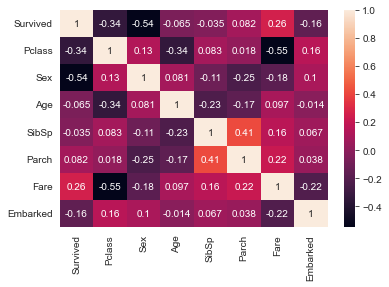

In [16]:
sns.heatmap(df2.corr(), annot=True) # generating correlation matrix of all the features

In [17]:
#splitting data into train and test 
from sklearn.model_selection import train_test_split
y= df2["Survived"]
x= df2.drop("Survived", axis=1)
x_train,x_test , y_train, y_test = train_test_split (x,y,
                                                     test_size= 0.2,
                                                     random_state=150)

# 3. Choosing a Model (2 ML and 1 simple NN)

#### 1. K-nearest neighbors (KNN)

In [18]:
from sklearn.preprocessing import StandardScaler

#Standardize values of the data
scaler = StandardScaler()
scaler.fit(x_train,y_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier

#Creating the model
classifier = KNeighborsClassifier(n_neighbors = 8)

#### 2. Support Vector Machine (SVM)

In [19]:
from sklearn import svm

#Create a svm Classifier
svmclf = svm.SVC(kernel='linear') # Linear Kernel

#### 3.  Multilayer Perceptron (MLP)

In [20]:
from sklearn.neural_network import MLPClassifier

#Creating of the model
model = MLPClassifier(max_iter=1000, activation='relu', solver='sgd' )

# 4. Training of Data

#### For KNN:

In [21]:
#Fitting of the model
classifier.fit(X_train, y_train)
#Prediction of the model for the test set
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0]


#### For SVM:

In [22]:
#For SVM:
#Train the model using the training sets
svmclf.fit(x_train, y_train)

#Predict the response for test dataset
svm_pred = svmclf.predict(x_test)
print(svm_pred)

[0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0]


#### For MLP:

In [23]:
#For MLP:
#Fitting of the model
model.fit(x_train,y_train)
#Prediction of the model
prediction = model.predict(x_test)
print(prediction)

[0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0]


# 5. Evaluation

#### For KNN:

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
#Checking of the Accuracy of KNN
result2 = accuracy_score(y_test,y_pred)
print("KNN")
print("Accuracy score:",result2*100)

KNN
Accuracy score: 84.35754189944134


#### For SVM:

In [25]:
# Model Accuracy Checking
print("SVM Accuracy:",metrics.accuracy_score(y_test, svm_pred)*100)

SVM Accuracy: 81.00558659217877


#### For MLP:

In [26]:
#For MLP:
#Checking the Accuracy of MLP model
print("MLP Classifier")
print("Accuracy score: ", format(accuracy_score(y_test, prediction)*100))

MLP Classifier
Accuracy score:  70.94972067039106


# 6. Hyperparameter Tuning

#### For KNN:

In [27]:
#import gridsearch
from sklearn.model_selection import GridSearchCV
grid_params = [{'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
]
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
KNN_gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [28]:
#displaying of the best parameters
KNN_be = KNN_gs.best_estimator_
print("best parameters: ", KNN_gs.best_params_) #printing the best parameters after the grid search
print("best estimators: ", KNN_gs.best_estimator_) #printing the best estimator of the model

best parameters:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
best estimators:  KNeighborsClassifier(metric='manhattan', n_neighbors=13)


In [29]:
# use the best parameters after the grid search
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
print(y_knn)
KNN_acc = round(accuracy_score(y_test,y_knn)*100, 2)
print("KNN Accuracy: ", KNN_acc)

[0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0]
KNN Accuracy:  86.03


#### For SVM:

In [30]:
svc_param_grid = [{'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
]
grid=GridSearchCV(svmclf, svc_param_grid, refit = True, verbose=1)

SVM_gs = grid.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [31]:
SVM_be = SVM_gs.best_estimator_
print("best parameters: ", SVM_gs.best_params_)
print("best estimators: ", SVM_gs.best_estimator_)

best parameters:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
best estimators:  SVC(C=100, gamma=0.001)


In [32]:
# use the best parameters after the grid search
svmclf = svm.SVC(C =100, gamma = 0.001, kernel='rbf') 
#Train the model using the training sets
svmclf.fit(x_train, y_train)
#Predict the response for test dataset
svm_pred = svmclf.predict(x_test)
print(svm_pred)
SVM_acc = round(accuracy_score(y_test, svm_pred)*100,2)
print("SVM Accuracy:", SVM_acc)

[0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1
 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0]
SVM Accuracy: 87.71


#### For MLP:

In [33]:
param_grid = [{'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['sgd', 'adam']}
]
mlps = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=3, scoring='accuracy')
mlp_res = mlps.fit(x_train,y_train)

In [34]:
MLP_be = mlp_res.best_estimator_ 
print("best parameters: ", mlp_res.best_params_)
print("best estimators: ", mlp_res.best_estimator_)

best parameters:  {'activation': 'tanh', 'solver': 'adam'}
best estimators:  MLPClassifier(activation='tanh', max_iter=1000)


In [35]:
# use the best parameters after the grid search
model = MLPClassifier(max_iter=1000, activation='tanh', solver='adam' )
model.fit(x_train,y_train)
prediction1 = model.predict(x_test)
print(prediction1)
MLP_acc = round(accuracy_score(y_test, prediction1)*100 , 2)
print("Accuracy score: ", MLP_acc)

[0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0]
Accuracy score:  83.24


In [36]:
#Summary for the models used after tuning
Models = pd.DataFrame({'Model':['K-nearest neighbors (KNN)', 'Support Vector Machines (SVM)', 'Multilayer Perceptron (MLP)'],
                      'Accuracy' : [KNN_acc, SVM_acc, MLP_acc,]})
Models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
1,Support Vector Machines (SVM),87.71
0,K-nearest neighbors (KNN),86.03
2,Multilayer Perceptron (MLP),83.24


# 7. Testing

In [37]:
testing=pd.read_csv("test.csv") #reading and loading of the test data
y_id=testing["PassengerId"] # will be used to to identify if PassengerId survived or not
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
#Cleaning of data
td = testing.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1) #dropping of the columns I think is not important
print (td)

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
..      ...     ...   ...    ...    ...       ...      ...
413       3    male   NaN      0      0    8.0500        S
414       1  female  39.0      0      0  108.9000        C
415       3    male  38.5      0      0    7.2500        S
416       3    male   NaN      0      0    8.0500        S
417       3    male   NaN      1      1   22.3583        C

[418 rows x 7 columns]


In [39]:
#Keeping only the features that is used in the algorithm
td.isnull().sum().sort_values(ascending=False)

Age         86
Fare         1
Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [40]:
#Using the mean value of the features to substitute into the empty or null data
col=["Age","Fare"]
for cell in col:
    td[cell].fillna(td[cell].mean(),inplace=True)

In [41]:
# converting male = 1, female = 0 , C=0 , Q= 1 , S= 2, U=3 
cols=["Sex","Embarked"]

for col in cols:
    td[col]=le.fit_transform(td[col])
    print(le.classes_)
      
td.isnull().sum().sort_values(ascending=False)

['female' 'male']
['C' 'Q' 'S']


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
td

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [43]:
#For KNN:
#Standardize values of the test data which will be used for KNN
scaler = StandardScaler()
scaler.fit(td)
x = scaler.transform(td)
print(x)

[[ 0.87348191  0.75592895  0.3349926  ... -0.4002477  -0.49840706
  -0.47091535]
 [ 0.87348191 -1.32287566  1.32553003 ... -0.4002477  -0.51327429
   0.70076689]
 [-0.31581919  0.75592895  2.51417495 ... -0.4002477  -0.46508846
  -0.47091535]
 ...
 [ 0.87348191  0.75592895  0.65196458 ... -0.4002477  -0.50879189
   0.70076689]
 [ 0.87348191  0.75592895  0.         ... -0.4002477  -0.4944482
   0.70076689]
 [ 0.87348191  0.75592895  0.         ...  0.61989583 -0.23790598
  -1.64259759]]


In [44]:
#prediction based on the three model to be used, will execute each model
knn_prediction = knn.predict(x)
svm_prediction = svmclf.predict(td)
mlp_prediction = model.predict(td)

In [45]:
#saving knn model prediction into csv file
df= pd.DataFrame({"PassengerId":y_id.values,
                "Survived":knn_prediction})

df.to_csv("knntest_output.csv",index=False)

In [46]:
#saving svm model prediction into csv file
df= pd.DataFrame({"PassengerId":y_id.values,
                "Survived":svm_prediction})

df.to_csv("svmtest_output.csv",index=False)

In [47]:
#saving MLP model prediction into csv file
df= pd.DataFrame({"PassengerId":y_id.values,
                "Survived":mlp_prediction})

df.to_csv("mlptest_output.csv",index=False)

### Conclusion: Through research, I found out that we can use their name and even ticket as a feature in the algorithm. There might be an underlying data behind them to which I am lacking of my understanding and knowledge in implementing and integrating them in the algorithms I made. With my experience, I had a hard time in processing the data as I am contemplating which features should I keep. Another one in the processing of data part is cleaning the data itself since there are null or empty cells in which I just substituted with either the mean value (for the age feature) and directly stated what would be substituted like the U which stands for unknown for the embarked feature. In the correlation matrix of the data with features I have kept, we can see that there are positively correlated with the survival of the person which are the parch and fare and negatively correlated with the survival of the person which are the Pclass, sex, age, SibSp, and embarked feature. Through visualization of the data, we can see that there is an underlying trend for each of the features I have kept despite it being negatively correlated just like the sex which shows that females tend to survive more than males maybe due to the officials prioritizing to safeguard females first. Another one is the sibling and spouse wherein the count plot shows than those who are alone or does not have any sibling and/or spouse in the ship tend to survive more as well as those who have one (1) with them got a survival rate of more than 50%. Also, we can see that those who with two (2) sibling and/or spouse have almost a 50/50 chance to survive. It is also the same for the Parch feature except that we can see and assume that those with two (2) parent and/or children have a 50% chance to survive and that there's a new data here wherein we can see that those with three (3) parent and/or children have a high survival rate as we cannot see or maybe too little to recognize for those who didn't survive with that amount of parent and/or children with them in the ship. In the embarked feature, we can also see that those from Cherbourg tend to survive more than the other port they embark from. Also, as for the hyperparameter tuning, it can still be improved like adding of additional parameters for grid searching but due to my limited knowledge, I only integrated a very few of them. Another is that we can apply "Feature engineering" in this project where we select, manipulate and transform raw data into features just like combining of the SibSp and Parch feature as well as combining age and sex since from the movies, there is this moment where the safety is prioritized for childrens and females so we can see an underlying trend if we apply feature engineering which I have not explored that much yet. Overall, I learned how to hypertune the models which is not introduced from my previous course, since we are only upto the evaluation of the model.

#### 